In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import json
%matplotlib inline


In [10]:
df1 = pd.read_csv('data/rent_apts.csv')
df1.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [3]:
df1.describe()

,sq_mtrs,Bedrooms,Bathrooms
count,1846.000000,1845.000000,1557.000000
mean,327.226977,2.577778,2.595376
std,2048.784581,0.819399,1.000349
min,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,3.000000,3.000000
max,40470.000000,6.000000,6.000000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


In [5]:
df1.Agency.unique().count

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [ ]:
df1.groupby('Neighborhood')['Neighborhood'].agg('count')

In [ ]:
df1['Agency'].value_counts()

In [ ]:
df1[(df1['Agency'].value_counts()  <= 1)]

In [6]:
df1['Agency'].unique()

array(['Buy Rent Shelters', 'Kenya Classic Homes',
       'Absolute Estate Agents', 'A1 Properties Limited',
       'Pmc Estates Limited', 'Lizmor Properties',
       'Mambo Properties Enterprise', 'Wealthlink Realtors Ltd',
       'Naftal Properties', 'Dakima Home International',
       'Opus Properties', 'Realty Plus', 'Pam Golding Properties',
       'Yellow Market', 'Hyra Real Estate Ltd',
       'Dunhill Consulting Limited', 'Green Knight Properties',
       'Kitheka Musyoka', 'Real Management Services 2002Limited',
       'Estate Masters Limited', 'Homekenya24',
       'Habitat Realtors International Ltd', 'Royani Properties Limited',
       'Unique Casles Management Ltd', 'Wainaina Real Estate Agents',
       'Havilaplus Estates Ltd', 'Ngong Hills Agency',
       'Chelezo Residency', 'Origin Homes', 'Cfs Homes',
       'Canaan Properties', 'Kimachas Enterprises', 'The Epic Properties',
       'Westside Real Estate', 'Tysons Limited', 'Crystal Valuers Ltd',
       'Swiveltrend Lt

In [ ]:
df1['Agency'].describe()



In [11]:
df1.isnull().sum()

Agency            0
Neighborhood      0
Price             0
link              0
sq_mtrs           2
Bedrooms          3
Bathrooms       291
dtype: int64

In [ ]:
df1.shape


In [ ]:
df1['Agency'].info

In [ ]:
df1


In [12]:
df2 = df1.drop(['link'],axis='columns')
df2.shape

(1848, 6)

In [ ]:
df2.head()

In [ ]:
df2.isnull().sum()

In [13]:
df2.Bathrooms.isnull().value_counts

<bound method IndexOpsMixin.value_counts of 0       False
1       False
2       False
3       False
4        True
        ...  
1843     True
1844    False
1845    False
1846    False
1847     True
Name: Bathrooms, Length: 1848, dtype: bool>

### Data Cleaning: Handle NA values

In [14]:
df2[(df2.Bathrooms.isnull())]

,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",3.0,3.0,NaN
5,Lizmor Properties,"Waiyaki Way, Westlands","KSh 150,000",2.0,2.0,NaN
8,Pmc Estates Limited,"Thika Road, Thika Road","KSh 85,000",4.0,4.0,NaN
19,Real Management Services 2002Limited,"Sports Road, Waiyaki Way, Westlands","KSh 13,000",0.0,0.0,NaN
36,Cfs Homes,"Ruaka, Kiambaa","KSh 16,000",1.0,1.0,NaN
...,...,...,...,...,...,...
1817,Capstone Properties,"General Mathenge, Westlands","KSh 175,000",3.0,3.0,NaN
1820,Cloud Real Estate,"General Mathenge, Westlands","KSh 175,000",4.0,4.0,NaN
1833,Rainbow Properties Limited,"State House, Dagoretti North","KSh 180,000",3.0,3.0,NaN
1843,Avic International,"Laikipia Road, Kileleshwa, Dagoretti North","KSh 180,000",3.0,3.0,NaN


In [15]:
def fill_nan_bath(row):
    if pd.isna(row['Bathrooms']):
        if row['Bedrooms'] > 0:
            row['Bathrooms'] = row['Bedrooms']
    return row

df3 = df2.apply(fill_nan_bath, axis=1)
df3.sq_mtrs.isnull().sum()

np.int64(2)

In [ ]:
df3.sq_mtrs.isnull()

In [16]:
df3 = df2.dropna()
df3.isnull().sum()

Agency          0
Neighborhood    0
Price           0
sq_mtrs         0
Bedrooms        0
Bathrooms       0
dtype: int64

In [ ]:
df3.head()

In [17]:
def convert_price_to_num(x):
    tokens = x.split(' ')
    return tokens[1]

df3["Price"] = df3['Price'].apply(convert_price_to_num)
df3
    

C:\Users\user\AppData\Local\Temp\ipykernel_8092\822842589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Price"] = df3['Price'].apply(convert_price_to_num)


,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","155,000",4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","100,000",300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","75,000",3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","135,000",227.0,3.0,4.0
6,Mambo Properties Enterprise,"Off Denis Pritt, Kilimani, Dagoretti North","100,000",14.0,2.0,3.0
...,...,...,...,...,...,...
1841,Origin Homes,"Brookside Drie, Karura, Westlands","180,000",3.0,3.0,3.0
1842,Origin Homes,"Brookside, Westlands","180,000",3.0,3.0,4.0
1844,Dmus Realtors,"Peponi road, Spring Valley, Westlands","180,000",2.0,2.0,2.0
1845,A1 Properties Limited,"Kileleshwa, Dagoretti North","180,000",4.0,4.0,5.0


In [18]:
df1.shape[0] - df2.shape[0]

0

###  Feature Engineering

In [19]:
def remove_comma(x):
    return int(x.replace(",", ""))
df3['Price'] = df3['Price'].apply(remove_comma)
df4 = df3.copy()
df4['price_per_sq_mtrs'] = df3['Price']/df3['sq_mtrs']
df4.head()


C:\Users\user\AppData\Local\Temp\ipykernel_8092\3826476425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Price'] = df3['Price'].apply(remove_comma)


,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,price_per_sq_mtrs
0,Buy Rent Shelters,"General Mathenge, Westlands",155000,4.0,4.0,4.0,38750.000000
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000,300.0,3.0,4.0,333.333333
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000,3.0,3.0,5.0,25000.000000
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000,227.0,3.0,4.0,594.713656
6,Mambo Properties Enterprise,"Off Denis Pritt, Kilimani, Dagoretti North",100000,14.0,2.0,3.0,7142.857143


In [20]:
location_stats = df4['Neighborhood'].value_counts(ascending=False)
location_stats



Neighborhood
Kilimani, Dagoretti North                             125
Westlands Area, Westlands                              87
Kileleshwa, Dagoretti North                            73
Lavington, Dagoretti North                             71
Riverside, Westlands                                   43
                                                     ... 
MUCHATHA- NATIONAL OIL, Ruaka, Kiambaa                  1
General Mathege, General Mathenge, Westlands            1
Mwingi Rd, Kileleshwa, Dagoretti North                  1
Denispritt, Kitale Lane, Kilimani, Dagoretti North      1
01, Marula Lane, Kilimani, Dagoretti North              1
Name: count, Length: 598, dtype: int64

In [ ]:
len(location_stats[location_stats<2
    ])

In [ ]:
df4

In [ ]:
df4


### Outlier Removal Using Bathrooms Feature


In [21]:
len(location_stats[location_stats ==5])

4

In [ ]:
df4.head()

In [ ]:
df4.Agency.sum()

In [ ]:
df4.duplicated().sum()

Text(0, 0.5, 'Count')

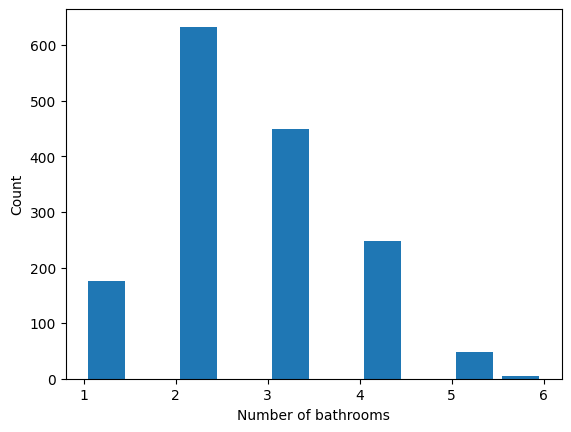

In [22]:
plt.hist(df4.Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [23]:
df5 = df4[df4.Bathrooms < 6]
df5.shape

(1553, 7)

Text(0, 0.5, 'Count')

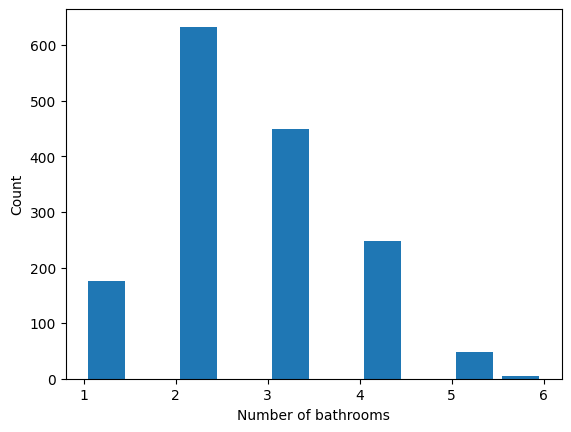

In [24]:
plt.hist(df4.Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [25]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Neighborhood'):
        m = np.mean(subdf.price_per_sq_mtrs)
        st = np.std(subdf.price_per_sq_mtrs)
        reduced_df = subdf[(subdf.price_per_sq_mtrs>(m- 3*st)) & (subdf.price_per_sq_mtrs<=(m+ 3*st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


(1003, 7)

In [26]:
df6.describe()

,Price,sq_mtrs,Bedrooms,Bathrooms,price_per_sq_mtrs
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,103400.299103,470.570289,2.637089,2.662014,31750.710321
std,37821.127093,2717.947727,0.769880,0.969815,23908.175050
min,16000.000000,1.000000,1.000000,1.000000,1.359031
25%,75000.000000,2.000000,2.000000,2.000000,14000.000000
50%,100000.000000,3.000000,3.000000,3.000000,32500.000000
75%,130000.000000,4.000000,3.000000,3.000000,43333.333333
max,220000.000000,40470.000000,5.000000,5.000000,160000.000000


In [28]:
df6.head()

,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,price_per_sq_mtrs
0,Coralinternational Ltd,"Argwings Kodhek Rd, Kilimani, Dagoretti North",150000,2.0,2.0,2.0,75000.000000
1,Pam Golding Properties,"Argwings Kodhek Rd, Kilimani, Dagoretti North",150000,3.0,3.0,4.0,50000.000000
2,Lavingtonmanagement,"Argwings Kodhek, Kilimani, Dagoretti North",65000,2.0,2.0,2.0,32500.000000
3,El Roi Properties,"Argwings Kodhek, Kilimani, Dagoretti North",150000,160.0,3.0,4.0,937.500000
4,Calmillers_Holding_Ltd,"Argwings Kodhek, Kilimani, Dagoretti North",165000,230.0,3.0,4.0,717.391304


### Use One Hot Encoding For Neighborhood



In [69]:
df6.Neighborhood.sum()

"Argwings Kodhek Rd, Kilimani, Dagoretti NorthArgwings Kodhek Rd, Kilimani, Dagoretti NorthArgwings Kodhek, Kilimani, Dagoretti NorthArgwings Kodhek, Kilimani, Dagoretti NorthArgwings Kodhek, Kilimani, Dagoretti NorthBrookside Drive, Brookside, WestlandsBrookside Drive, Brookside, WestlandsBrookside Drive, Brookside, WestlandsBrookside Drive, Brookside, WestlandsBrookside groove, Brookside, WestlandsBrookside groove, Brookside, WestlandsBrookside, Brookside, WestlandsBrookside, Brookside, WestlandsBrookside, Brookside, WestlandsBrookside, Brookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, WestlandsBrookside, Westlands Area, WestlandsBrookside, Westlands Area, WestlandsBrookside, Westlands Area, WestlandsBrooksi

In [72]:
dummies_location = pd.get_dummies(df6.Neighborhood, dtype = 'i')
dummies_location

,"Argwings Kodhek Rd, Kilimani, Dagoretti North","Argwings Kodhek, Kilimani, Dagoretti North","Brookside Drive, Brookside, Westlands","Brookside groove, Brookside, Westlands","Brookside, Brookside, Westlands","Brookside, Westlands","Brookside, Westlands Area, Westlands","Chania Avenue, Kilimani, Dagoretti North","Denis Pritt, Kilimani, Dagoretti North","Dennis Pritt, Dagoretti North",...,"Westlands, Westlands Area, Westlands","kiambu road, kiambu road, Kiambu Road, Kiambu Road","kileleshwa, Kileleshwa, Kileleshwa, Dagoretti North","kileleshwa, kileleshwa, Kileleshwa, Dagoretti North","kilimani, Kilimani, Kilimani, Dagoretti North","kilimani, kilimani, Kilimani, Dagoretti North","lavington, Lavington, Lavington, Dagoretti North","lavington, lavington, Lavington, Dagoretti North","mvuli road, Rhapta Road, Westlands","riverside, Riverside, Riverside, Westlands"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
len(df6[(df6['Agency'] == 'Zone East Africa')])

2

In [67]:
len(df6[(df6['Neighborhood'] == 'Westland')])

0

In [70]:
dummies_Agency = pd.get_dummies(df6.Agency, dtype = 'i')
dummies_Agency.drop('Visions Place',axis='columns')
dummies_Agency



,A List Real Estate,A1 Properties Limited,Abec Real Estate,Absolute Estate Agents,Acurate Homes Limited,Afrique Properties Limited,Allione Real Estate,Antel Limited,Apogee Realty Homes,Apricotsolutions Limited,...,Vaal Real Estate,Visions Place,Vsb Properties Limited,Washington Homes Kenya,Wealthlink Realtors Ltd,Westside Real Estate,Ws Properties Limited,Yc Real Estate Limited,Yellow Market,Zone East Africa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
location_stats = df6['Neighborhood'].value_counts(ascending=False)
len(location_stats[location_stats <=1
    ])

df7 = df6.drop(['Neighborhood','Agency','price_per_sq_mtrs'],axis='columns')
df8 = pd.concat([df7,dummies_Agency,dummies_location],axis='columns')
df8

,Price,sq_mtrs,Bedrooms,Bathrooms,A List Real Estate,A1 Properties Limited,Abec Real Estate,Absolute Estate Agents,Acurate Homes Limited,Afrique Properties Limited,...,"Westlands, Westlands Area, Westlands","kiambu road, kiambu road, Kiambu Road, Kiambu Road","kileleshwa, Kileleshwa, Kileleshwa, Dagoretti North","kileleshwa, kileleshwa, Kileleshwa, Dagoretti North","kilimani, Kilimani, Kilimani, Dagoretti North","kilimani, kilimani, Kilimani, Dagoretti North","lavington, Lavington, Lavington, Dagoretti North","lavington, lavington, Lavington, Dagoretti North","mvuli road, Rhapta Road, Westlands","riverside, Riverside, Riverside, Westlands"
0,150000,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,150000,3.0,3.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65000,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,150000,160.0,3.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,165000,230.0,3.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,110000,4.0,4.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999,110000,3.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000,125000,3.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1001,140000,3.0,3.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Build a Model

In [83]:
X  = df8.drop('Price',axis='columns')
y = df8.Price
X

,sq_mtrs,Bedrooms,Bathrooms,A List Real Estate,A1 Properties Limited,Abec Real Estate,Absolute Estate Agents,Acurate Homes Limited,Afrique Properties Limited,Allione Real Estate,...,"Westlands, Westlands Area, Westlands","kiambu road, kiambu road, Kiambu Road, Kiambu Road","kileleshwa, Kileleshwa, Kileleshwa, Dagoretti North","kileleshwa, kileleshwa, Kileleshwa, Dagoretti North","kilimani, Kilimani, Kilimani, Dagoretti North","kilimani, kilimani, Kilimani, Dagoretti North","lavington, Lavington, Lavington, Dagoretti North","lavington, lavington, Lavington, Dagoretti North","mvuli road, Rhapta Road, Westlands","riverside, Riverside, Riverside, Westlands"
0,2.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,160.0,3.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,230.0,3.0,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,4.0,4.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
999,3.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1000,3.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1001,3.0,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.07308970099667775

In [89]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.42082908, 0.49132971, 0.55717723, 0.50539429, 0.40318165])

In [ ]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
    
        'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        } ,
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }}
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)